In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    roc_auc_score, roc_curve, precision_recall_curve, f1_score
)
from imblearn.over_sampling import SMOTE

import kagglehub
import warnings
warnings.filterwarnings("ignore")

In [ ]:
path = kagglehub.dataset_download("kartik2112/fraud-detection")
df = pd.read_csv(os.path.join(path, "fraudTrain.csv"))
print("Initial Shape:", df.shape)
df.head()

Initial Shape: (1296675, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


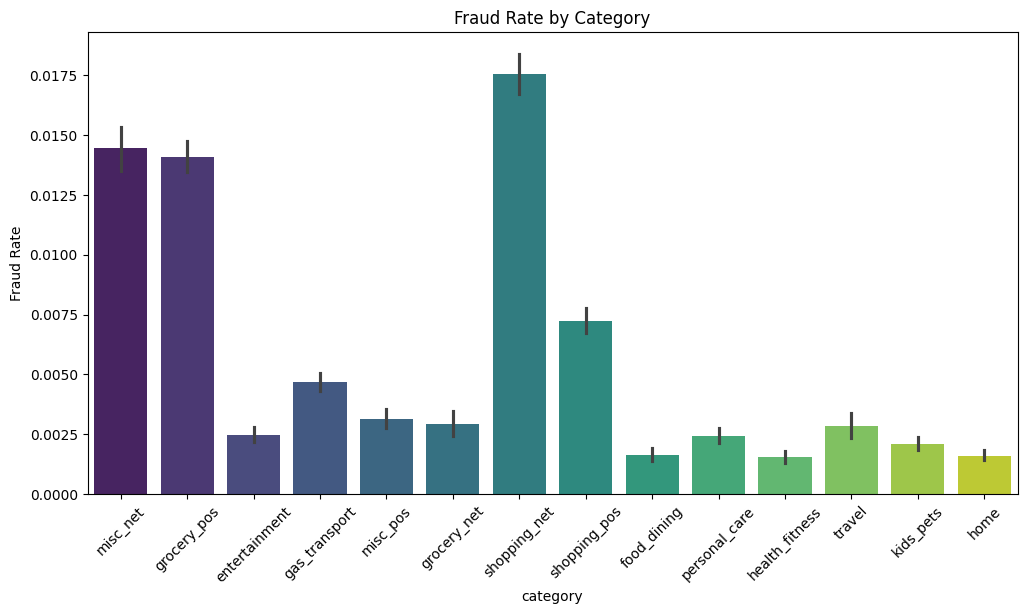

In [ ]:
if 'category' in df.columns:
    plt.figure(figsize=(12,6))
    sns.barplot(x='category', y='is_fraud', data=df, estimator=np.mean, palette='viridis')
    plt.title("Fraud Rate by Category")
    plt.ylabel("Fraud Rate")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
df = df.drop(columns=['Unnamed: 0'])
df.rename(columns={'is_fraud': 'IsFraud'}, inplace=True)

if 'trans_date_trans_time' in df.columns:
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['Hour'] = df['trans_date_trans_time'].dt.hour



if 'trans_date_trans_time' in df.columns:
    df.drop(columns=['trans_date_trans_time'], inplace=True)

    cat_cols = df.select_dtypes(include='object').columns
print("Categorical columns:", list(cat_cols))

df = df.select_dtypes(include=[np.number])

print("Missing values:\n", df.isnull().sum())

print("After cleanup:")
df.head()

Categorical columns: ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']
Missing values:
 cc_num        0
amt           0
zip           0
lat           0
long          0
city_pop      0
unix_time     0
merch_lat     0
merch_long    0
IsFraud       0
Hour          0
dtype: int64
After cleanup:


,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,IsFraud,Hour
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,0
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,0
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,0
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,0
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,0


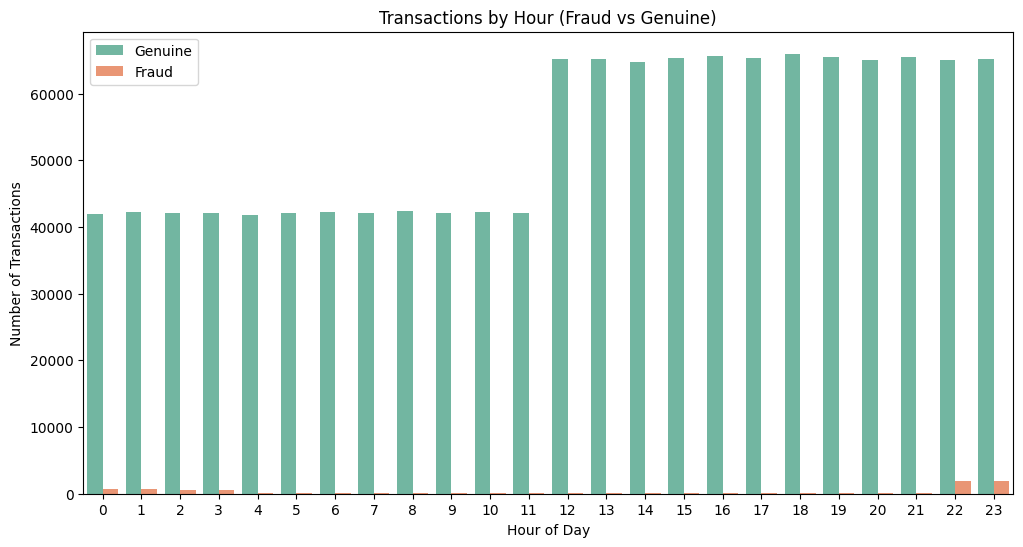

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Hour', hue='IsFraud', data=df, palette='Set2')
plt.title("Transactions by Hour (Fraud vs Genuine)")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Transactions")
plt.legend(['Genuine', 'Fraud'])
plt.show()


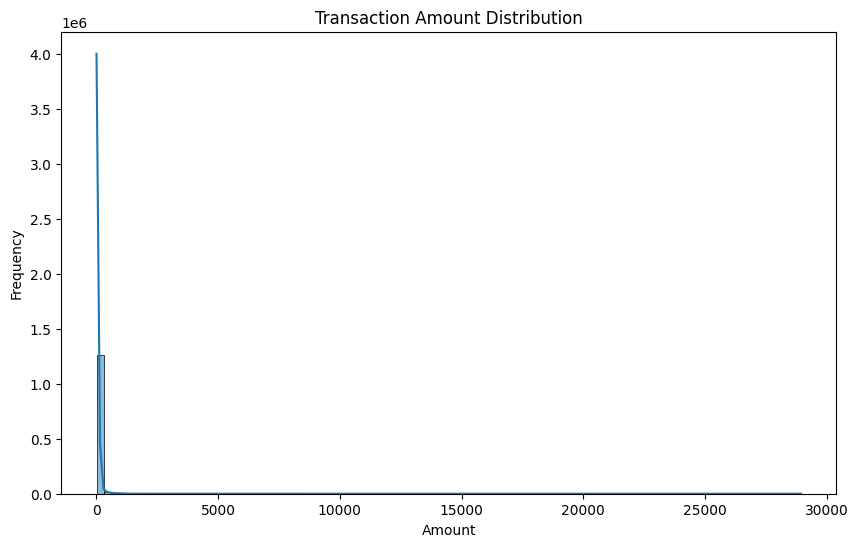

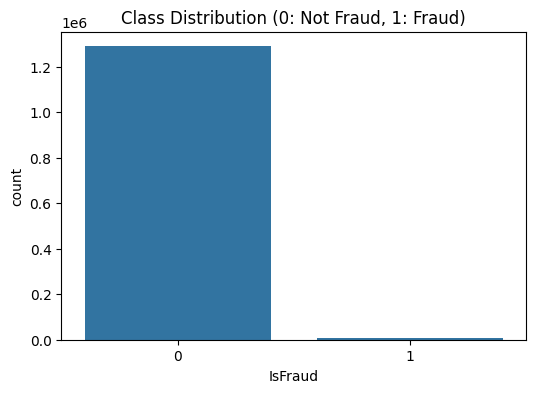

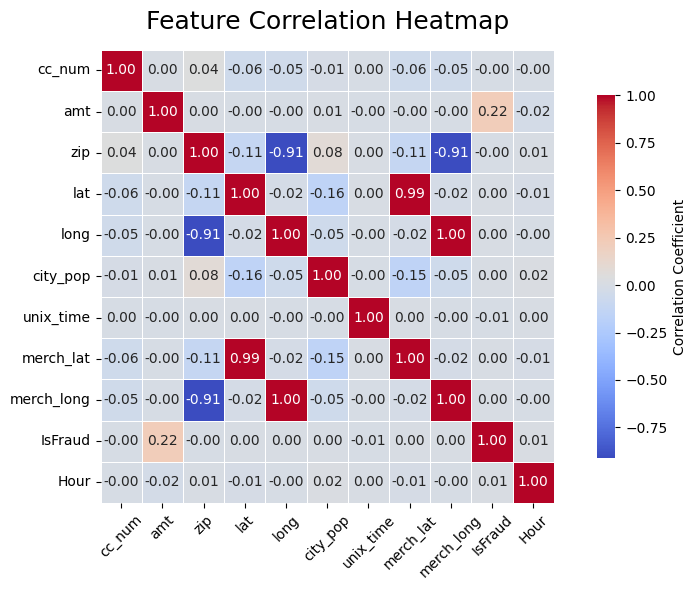

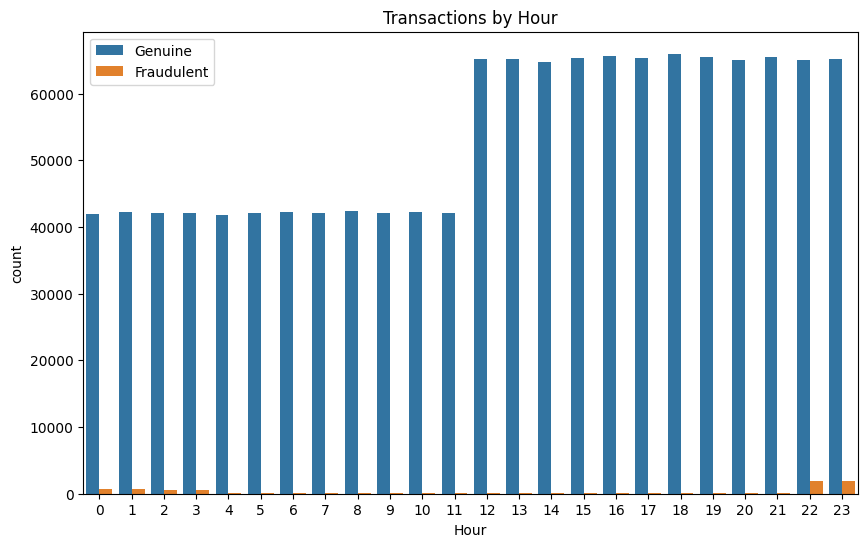

In [ ]:

plt.figure(figsize=(10,6))
sns.histplot(df['amt'], bins=100, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='IsFraud', data=df)
plt.title('Class Distribution (0: Not Fraud, 1: Fraud)')
plt.show()

plt.figure(figsize=(9, 6))
sns.heatmap(
    df.corr(),
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}
)
plt.title("Feature Correlation Heatmap", fontsize=18, pad=15)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

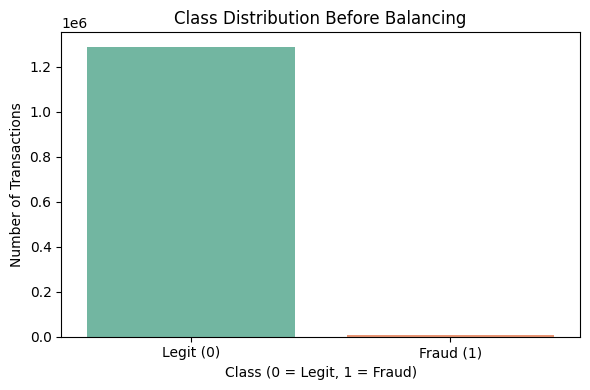

In [ ]:

plt.figure(figsize=(6,4))
sns.countplot(x='IsFraud', data=df, palette='Set2')
plt.title('Class Distribution Before Balancing')
plt.xlabel('Class (0 = Legit, 1 = Fraud)')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Legit (0)', 'Fraud (1)'])
plt.tight_layout()
plt.show()


In [ ]:
scaler = StandardScaler()
df['amt'] = scaler.fit_transform(df[['amt']])
df.head()

X = df.drop(columns=['IsFraud'])
y = df['IsFraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

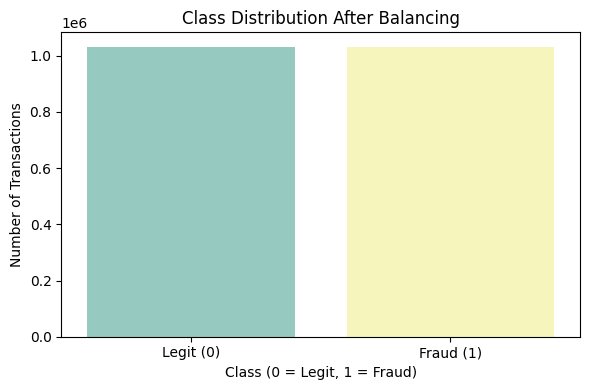

In [ ]:
# After Balancing
plt.figure(figsize=(6,4))
sns.countplot(x=y_res, palette='Set3')
plt.title('Class Distribution After Balancing')
plt.xlabel('Class (0 = Legit, 1 = Fraud)')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Legit (0)', 'Fraud (1)'])
plt.tight_layout()
plt.show()


In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_res, y_res)
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

# Random Forest
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X_res, y_res)
# y_pred_rf = rf.predict(X_test)
# y_prob_rf = rf.predict_proba(X_test)[:, 1]

In [ ]:
def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"\n📊 {name} Results:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_true, y_prob):.2f}")
    plt.plot([0,1],[0,1],'--')
    plt.title(f"{name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Precision-Recall
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    plt.plot(recall, precision)
    plt.title(f"{name} - Precision Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.grid(True)
    plt.show()


📊 Logistic Regression Results:
Accuracy: 0.9942121194593865
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    257834
           1       0.00      0.00      0.00      1501

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335



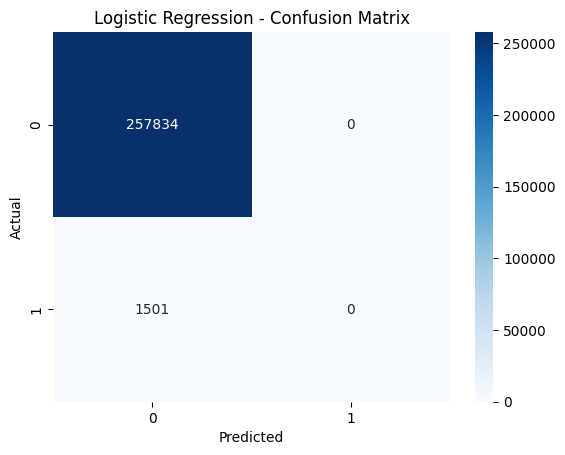

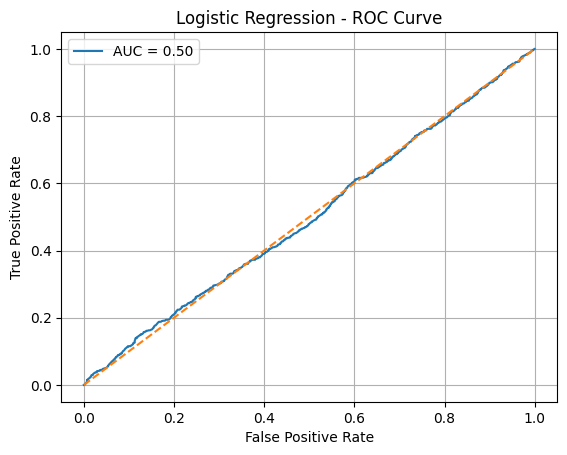

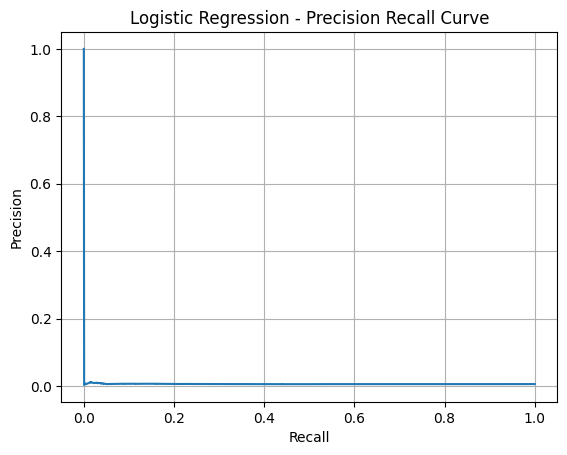

In [ ]:
# 🧪 Evaluate Both Models
evaluate_model("Logistic Regression", y_test, y_pred_lr, y_prob_lr)
# evaluate_model("Random Forest", y_test, y_pred_rf, y_prob_rf)

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_res, y_res)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]


📊 Random Forest Results:
Accuracy: 0.9936221489579116
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    257834
           1       0.47      0.80      0.59      1501

    accuracy                           0.99    259335
   macro avg       0.73      0.90      0.79    259335
weighted avg       1.00      0.99      0.99    259335



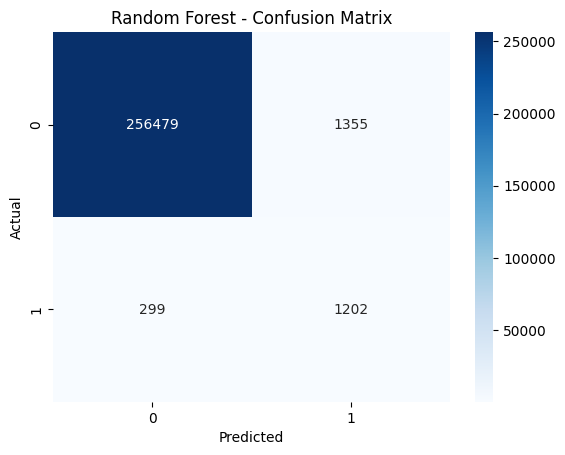

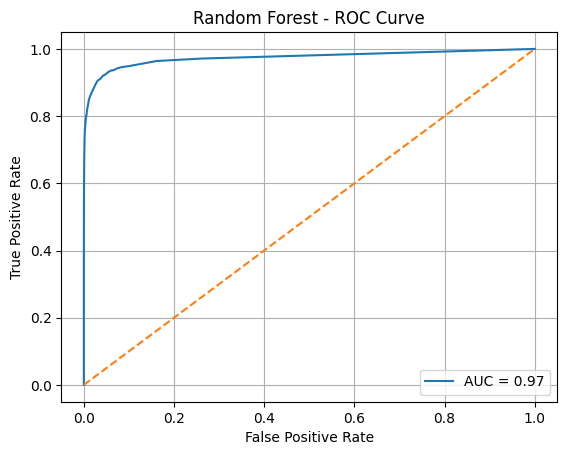

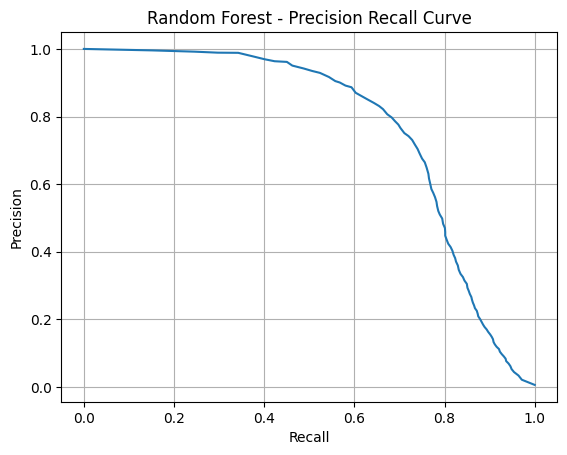

In [ ]:
evaluate_model("Random Forest", y_test, y_pred_rf, y_prob_rf)

In [ ]:
importances = rf.feature_importances_
feature_names = X.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Feature Importance (Random Forest)', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


KeyError: 'Hour'